In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import expm
np.set_printoptions(suppress=True)

In [52]:
m = 7
Len = 1#2*np.pi
x = np.arange(m)*Len/m
dx = x[1]-x[0]

F = np.zeros((m,m),dtype=complex)
for j in range(m):
    for k in range(m):
        F[j,k] = np.exp(2j*np.pi*j*k/m)/np.sqrt(m)  # Script F in paper

In [53]:
xi = 2*np.pi*np.arange(m)/m
Lmat = np.dot(F,np.dot(np.diag(1j*np.sin(xi)),F.conj()))
Lmat=np.real(Lmat)
Lmat

array([[ 0. ,  0.5, -0. ,  0. , -0. , -0. , -0.5],
       [-0.5,  0. ,  0.5, -0. , -0. , -0. , -0. ],
       [ 0. , -0.5,  0. ,  0.5,  0. , -0. ,  0. ],
       [-0. ,  0. , -0.5, -0. ,  0.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  0. ,  0.5, -0. ],
       [ 0. ,  0. ,  0. , -0. , -0.5,  0. ,  0.5],
       [ 0.5,  0. , -0. , -0. ,  0. , -0.5, -0. ]])

In [64]:
# Note that L in the paper is \Delta x times this L.
xi = np.fft.fftfreq(m)*(m)*2*np.pi/Len  # Wavenumber "grid"
if m % 2 == 0:
    xi[m//2]=0
L = np.dot(F,np.dot(np.diag(1j*xi),F.conj()))
L=np.real(L)
L

array([[ 0.        ,  7.24063239, -4.01824782,  3.22238456, -3.22238456,
         4.01824782, -7.24063239],
       [-7.24063239, -0.        ,  7.24063239, -4.01824782,  3.22238456,
        -3.22238456,  4.01824782],
       [ 4.01824782, -7.24063239, -0.        ,  7.24063239, -4.01824782,
         3.22238456, -3.22238456],
       [-3.22238456,  4.01824782, -7.24063239, -0.        ,  7.24063239,
        -4.01824782,  3.22238456],
       [ 3.22238456, -3.22238456,  4.01824782, -7.24063239,  0.        ,
         7.24063239, -4.01824782],
       [-4.01824782,  3.22238456, -3.22238456,  4.01824782, -7.24063239,
         0.        ,  7.24063239],
       [ 7.24063239, -4.01824782,  3.22238456, -3.22238456,  4.01824782,
        -7.24063239, -0.        ]])

In [65]:
xi

array([  0.        ,   6.28318531,  12.56637061,  18.84955592,
       -18.84955592, -12.56637061,  -6.28318531])

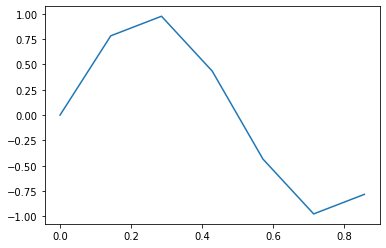

In [66]:
y = np.sin(2*np.pi*x)
plt.plot(x,y)

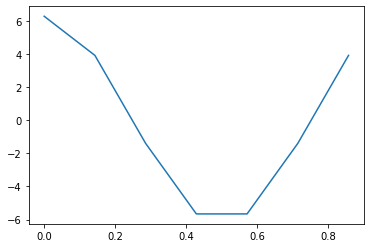

In [67]:
plt.plot(x,np.dot(L,y))#+0.75*np.cos(5*x))

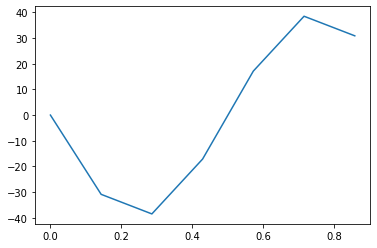

In [68]:
plt.plot(x,np.dot(L,np.dot(L,y)))

In [396]:
def check_fft(u):
    m = len(u)
    xi = np.fft.fftfreq(m)*m
    if m % 2 == 0:
        xi[m//2]=0
    uhat = np.zeros_like(u,dtype='complex64')
    
    for k in range(m):
        for j in range(m):
            uhat[k] += u[j]*np.exp(-2j*np.pi*k*j/m)
    print(uhat-np.fft.fft(u))
    return np.fft.ifft(np.dot(np.diag(1j*xi),uhat))
    uhat = uhat/m
    uhat = uhat*1j*xi
        
    uret = np.zeros_like(u,dtype='complex64')
    for j in range(m):
        for k in range(m):
            uret[j] += uhat[k]*np.exp(2j*np.pi*k*j/m)
    print(uret - np.fft.ifft(np.dot(np.diag(1j*xi),uhat)))
    return np.real(uret)

In [397]:
check_fft(y)

[-0.00000015+0.j         -0.00000047+0.00000005j  0.00000005+0.00000002j
 -0.00000001-0.00000007j  0.00000005+0.00000001j -0.00000007-0.00000002j
 -0.00000006+0.j         -0.00000007+0.00000002j  0.00000005-0.00000001j
 -0.00000001+0.00000007j -0.00000001-0.00000002j -0.00000047-0.00000005j]


array([-0.09915682+0.00000001j, -0.56221306+0.j        ,
       -1.00551768-0.j        , -1.07147188-0.00000001j,
       -0.83078857-0.j        , -0.30177779+0.j        ,
        0.30177789+0.00000001j,  0.83078813+0.j        ,
        1.07147233-0.j        ,  1.0055177 -0.00000001j,
        0.56221285-0.j        ,  0.0991569 +0.j        ])

In [398]:
np.fft.fft(y)

array([ 0.99999991-0.j        ,  5.97905873+1.60208375j,
       -0.34888976-0.20143146j, -0.09435122-0.09435122j,
       -0.02958902-0.0512501j , -0.00622857-0.02324514j,
       -0.00000024+0.j        , -0.00622857+0.02324514j,
       -0.02958902+0.0512501j , -0.09435122+0.09435122j,
       -0.34888976+0.20143146j,  5.97905873-1.60208375j])

In [399]:
np.sum(y)

(0.9999999+0j)

In [400]:
def fornberg(u):
    m = len(u)
    xi = np.fft.fftfreq(m)*m
    if m % 2 == 0:
        xi[m//2]=0
    print(xi)
    uhat = np.zeros_like(u,dtype='complex64')
    
    for k in range(m):
        for j in range(m):
            uhat[k] += u[j]*np.exp(-2j*np.pi*k*j/m)
        uhat[k] = uhat[k]/m
    uhat = uhat*1j*xi
        
    uret = np.zeros_like(u,dtype='complex64')
    for j in range(m):
        for k in range(m):
            uret[j] += uhat[k]*np.exp(2j*np.pi*k*j/m)
    return np.real(uret)

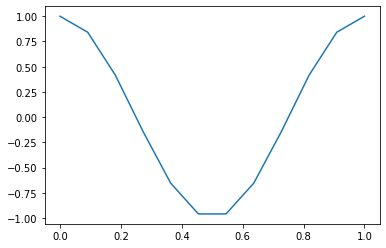

In [401]:
y = np.cos(2*np.pi*x,dtype='complex64')
plt.plot(x,np.real(y))

[ 0.  1.  2.  3.  4.  5.  0. -5. -4. -3. -2. -1.]


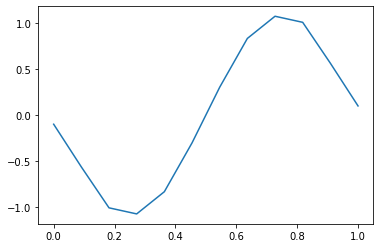

In [404]:
plt.plot(x,fornberg(y))

[ 0.  1.  2.  3.  4.  5.  0. -5. -4. -3. -2. -1.]
[ 0.  1.  2.  3.  4.  5.  0. -5. -4. -3. -2. -1.]


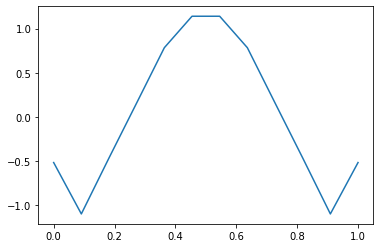

In [405]:
plt.plot(x,fornberg(fornberg(y)))

In [392]:
np.fft?

In [282]:
np.dot(F,y)

array([ 0.28867511+0.j        ,  1.72600558-0.46248174j,
       -0.1007158 +0.05814825j, -0.02723685+0.02723685j,
       -0.00854161+0.01479463j, -0.00179803+0.00671029j,
       -0.00000007-0.j        , -0.00179803-0.00671029j,
       -0.00854161-0.01479463j, -0.02723685-0.02723685j,
       -0.1007158 -0.05814825j,  1.72600558+0.46248174j])

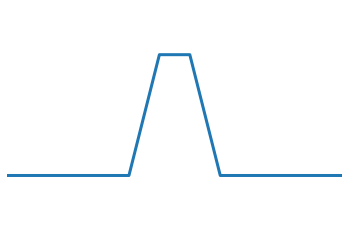

In [283]:
dx = x[1]-x[0]
u = (x>0.4)*(x<0.6)
plt.plot(x,u,lw=3)
plt.xlim(0,1)
plt.ylim(-0.4,1.4)
plt.axis('off');

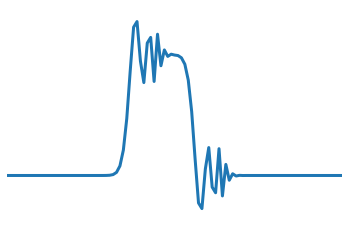

In [5]:
#dt = 0.5*dx
nu = 5.
unew = np.dot(expm(nu*L),u)
plt.plot(x,unew,lw=3)
plt.xlim(0,1);
plt.ylim(-0.4,1.4)
plt.axis('off');

0.011762935650293765


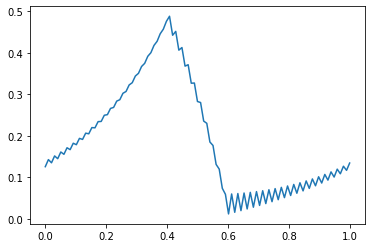

In [6]:
nu = 30.5
I = np.eye(m)
unew = np.linalg.solve(I-nu*L,u)
plt.plot(x,unew)
print(min(unew))

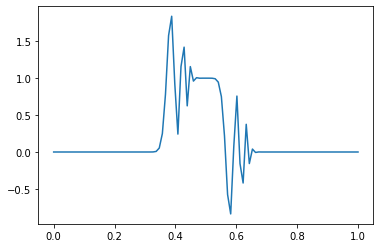

In [7]:
nu = 0.5
I = np.eye(m)
u = (x>0.4)*(x<0.6)

for i in range(10):
    u = np.dot(I+nu*L,u)
plt.plot(x,u)

(-1.3199999999999998,
 1.3199999999999998,
 -1.3199999999999998,
 1.3199999999999998)

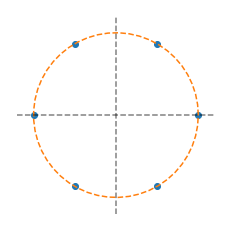

In [10]:
m = 6
xi = 2*np.pi*np.arange(m)/m
theta = np.exp(1j*xi)
plt.plot(np.real(theta),np.imag(theta),'o')
plt.axis('equal')
thet = np.exp(1j*np.linspace(0,2*np.pi))
plt.plot(np.real(thet),np.imag(thet),'--')
plt.plot([-1.2,1.2],[0,0],'--k',alpha=0.5)
plt.plot([0,0],[-1.2,1.2],'--k',alpha=0.5)
plt.axis('square')
plt.xlabel('Real part')
plt.ylabel('Imaginary part');
plt.axis('off')